In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Create the data
data = {
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

# Create the DataFrame
df = pd.DataFrame(data)

print(df)


    Temp  Yield
0     50    3.3
1     50    2.8
2     50    2.9
3     70    2.3
4     70    2.6
5     70    2.1
6     80    2.5
7     80    2.9
8     80    2.4
9     90    3.0
10    90    3.1
11    90    2.8
12   100    3.3
13   100    3.5
14   100    3.0


attempt 2:

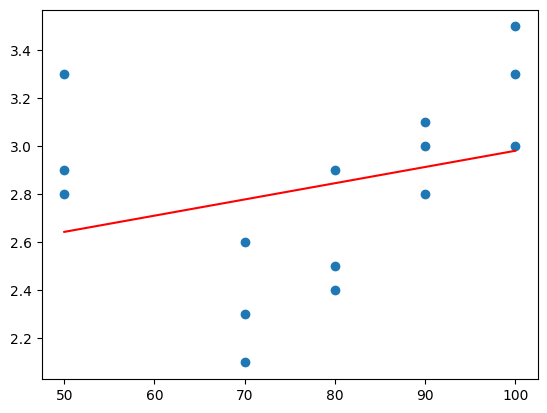

In [4]:
#simple linear:
x_mean = np.mean(df['Temp'])
y_mean = np.mean(df['Yield'])

b1 = np.sum((df['Temp'] - x_mean) * (df["Yield"]-y_mean)) / np.sum((df['Temp'] - x_mean) ** 2)
b0 = y_mean - b1*x_mean

predictions_simple=b0 + b1*df["Temp"]
plt.scatter(df["Temp"], df["Yield"])
plt.plot(df["Temp"], predictions_simple, color ="red")
plt.show()


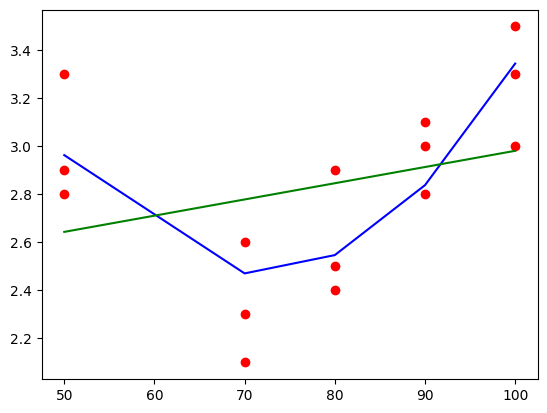

In [5]:
#polynomial regression
x = df["Temp"]
y = df["Yield"]
a11 = len(df["Temp"])
a12 = np.sum(x)
a13 = np.sum(x**2)
a21 = np.sum(x)
a22 = np.sum(x**2)
a23 = np.sum(x**3)
a31 = np.sum(x**2)
a32 = np.sum(x**3)
a33 = np.sum(x**4)

A = np.array([[a11,a12,a13],
              [a21,a22,a23],
              [a31,a32,a33]])
B = np.array([np.sum(y), np.sum(x*y), np.sum(x*x*y)])

b0,b1,b2 = np.linalg.inv(A) @ B

predictions = b0 + b1*x + b2*(x**2)

plt.scatter(x,y, color = "red")
plt.plot(x, predictions, color = "blue")
plt.plot(x, predictions_simple, color = "green")
plt.show()


In [6]:
mse = np.sum((x - x_mean)**2)
rmse = mse**0.5
print("mse: ", mse, "rmse: ", rmse)

mse:  4440.0 rmse:  66.63332499583073


attempt 1:


In [7]:
#simple linear regression
# matrix/calculus method
x = df['Temp']
design = np.vstack([np.ones(len(x)), x]).T
y = df['Yield']

theta = np.linalg.inv(design.T @ design) @ design.T @ y
intercept, slope = theta
print(f'Intercept: {intercept}, Slope: {slope}')

Intercept: 2.30630630630631, Slope: 0.006756756756756771


In [8]:
#finding polynomial regression equation
x11= len(x)
x12 = np.sum(x)
x13 = np.sum(x**2)
x21 = np.sum(x)
x22 = np.sum(x**2)
x23 = np.sum(x**3)
x31 = np.sum(x**2)
x32 = np.sum(x**3)
x33 = np.sum(x**4)

A = np.array([[x11, x12, x13],
               [x21, x22, x23], 
               [x31, x32, x33]])

B = np.array([np.sum(y), np.sum(x*y), np.sum(x**2*y)])

# coefficients = np.linalg.solve(A, B)
coefficients = np.linalg.inv(A) @ B
a, b, c = coefficients

print(f'Intercept: {a}, Slope: {b}, Slope2: {c}')

Intercept: 7.960481099654774, Slope: -0.15371134020613803, Slope2: 0.0010756013745701848


#### Q3
manually intuitive vs matrix

In [9]:
#manually intuitive
x_mean = np.mean(x)
y_mean = np.mean(y)
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b0 = y_mean - b1 * x_mean
print(f'Intercept: {b0}, Slope: {b1} (manually intuitive)')
print(f'Intercept: {intercept}, Slope: {slope} (matrix/calculus method)')


Intercept: 2.306306306306306, Slope: 0.006756756756756758 (manually intuitive)
Intercept: 2.30630630630631, Slope: 0.006756756756756771 (matrix/calculus method)


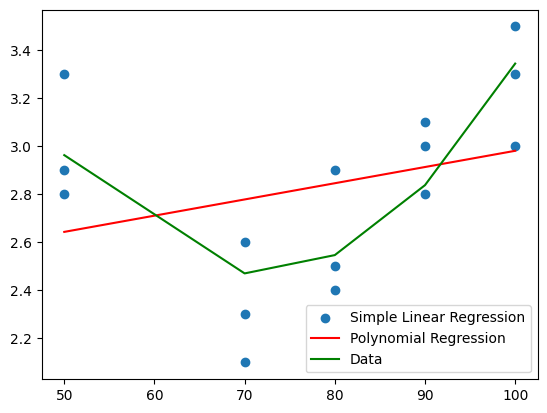

In [10]:
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.plot(x, a + b*x + c*x**2, color='green')
plt.legend(['Simple Linear Regression', 'Polynomial Regression', 'Data'])
plt.show()

### Multiple Linear Regression (Q2)

In [11]:
import pandas as pd

# Data
data = {
    "Infarc": [0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
               0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35, 
               0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538, 
               0.625, 0.974],
    "Area": [0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47, 
             0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22, 
             0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19, 
             1.22, 1.4],
    "Group": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
              2,2],
    "X2": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0],
    "X3": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
           1, 1]
}

# print(len(data["Infarc"]))
# print(len(data["Area"]))
# print(len(data["Group"]))
# print(len(data["X2"]))
# print(len(data["X3"]))


# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Infarc  Area  Group  X2  X3
0    0.119  0.34      3   0   0
1    0.190  0.64      3   0   0
2    0.395  0.76      3   0   0
3    0.469  0.83      3   0   0
4    0.130  0.73      3   0   0
5    0.311  0.82      3   0   0
6    0.418  0.95      3   0   0
7    0.480  1.06      3   0   0
8    0.687  1.20      3   0   0
9    0.847  1.47      3   0   0
10   0.062  0.44      1   1   0
11   0.122  0.77      1   1   0
12   0.033  0.90      1   1   0
13   0.102  1.07      1   1   0
14   0.206  1.01      1   1   0
15   0.249  1.03      1   1   0
16   0.220  1.16      1   1   0
17   0.299  1.21      1   1   0
18   0.350  1.20      1   1   0
19   0.350  1.22      1   1   0
20   0.588  0.99      2   0   1
21   0.379  0.77      2   0   1
22   0.149  1.05      2   0   1
23   0.316  1.06      2   0   1
24   0.390  1.02      2   0   1
25   0.429  0.99      2   0   1
26   0.477  0.97      2   0   1
27   0.439  1.12      2   0   1
28   0.446  1.23      2   0   1
29   0.538  1.19      2   0   1
30   0.6

#attemp2

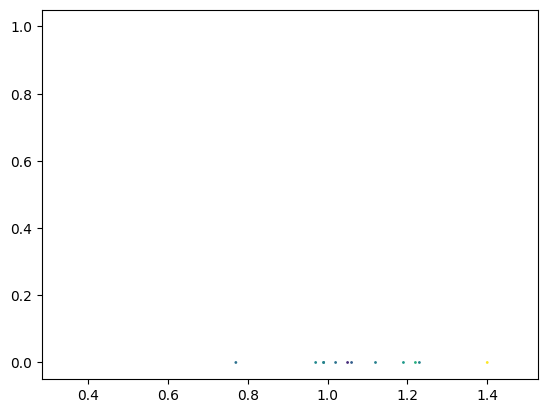

In [12]:
design = np.vstack([np.ones(len(df['Infarc'])) , df["Area"], df["X2"], df["X3"]]).T



b0,b1,b2,b3 = np.linalg.inv(design.T @ design) @ design.T @ df['Infarc']

predictions_multiple = b0 + b1*df["Area"] + b2*df["X2"] + b3*df["X3"]

plt.scatter(df["Area"], df["X2"], df["X3"], df["Infarc"])
plt.show()







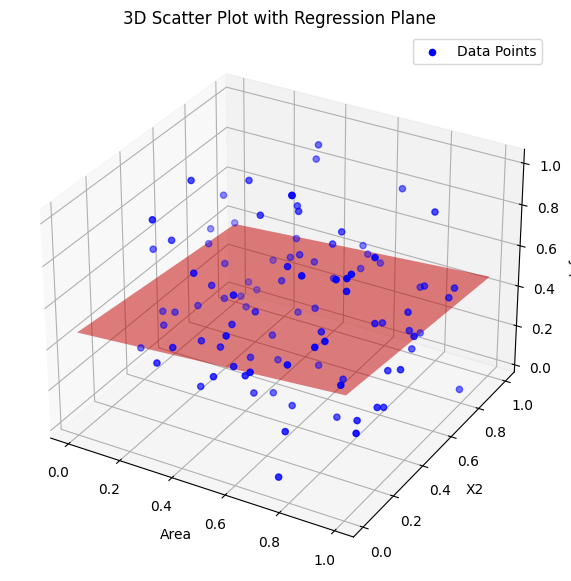

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace with your actual DataFrame)
df = pd.DataFrame({
    "Area": np.random.rand(100),
    "X2": np.random.rand(100),
    "X3": np.random.rand(100),
    "Infarc": np.random.rand(100)
})

# Design matrix and coefficients calculation
design = np.vstack([np.ones(len(df['Infarc'])), df["Area"], df["X2"], df["X3"]]).T
b0, b1, b2, b3 = np.linalg.inv(design.T @ design) @ design.T @ df['Infarc']

# Predictions based on the model
predictions_multiple = b0 + b1 * df["Area"] + b2 * df["X2"] + b3 * df["X3"]

# 3D scatter plot of the data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Area"], df["X2"], df["Infarc"], color='b', label='Data Points')  # Scatter plot in 3D

# Create a mesh grid to plot the regression plane
x_surf, y_surf = np.meshgrid(
    np.linspace(df["Area"].min(), df["Area"].max(), 10),
    np.linspace(df["X2"].min(), df["X2"].max(), 10)
)

# Calculate z values (plane values) using the regression equation
z_surf = b0 + b1 * x_surf + b2 * y_surf + b3 * np.mean(df["X3"])  # Using mean of X3 for plane calculation

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='r', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')
ax.set_title('3D Scatter Plot with Regression Plane')

plt.legend()
plt.show()


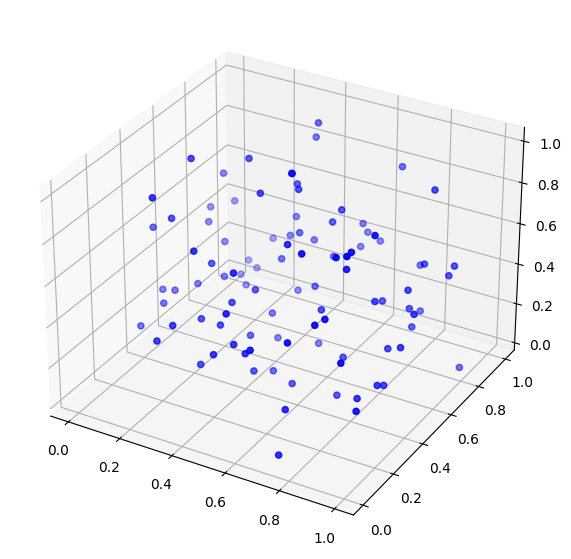

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Area"], df["X2"], df["Infarc"], color='b', label='Data Points') 



In [15]:
design = np.vstack([np.ones(len(df['Infarc'])), df['Area'], df['X2'], df['X3']]).T
y = df['Infarc']

# print(design)


theta = np.linalg.inv(design.T @ design) @ design.T @ y
a0, a1, a2, a3 = theta
print(f'Intercept: {a0}, Slope1: {a1}, Slope2: {a2}, Slope3: {a3}')

Intercept: 0.49634993329927546, Slope1: 0.09162065664074304, Slope2: -0.09140880489186336, Slope3: -0.057186460668827925


In [16]:
#mse
predicted = a0 + a1*df['Area'] + a2*df['X2'] + a3*df['X3']
mse = np.sum((y - predicted)**2 ) / len(df['Area'])
print(mse)


0.06958507582745016


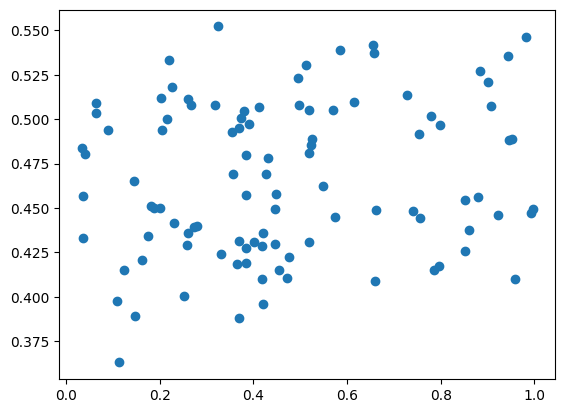

In [17]:
plt.scatter(df['Infarc'], predicted)
plt.show()